In [1]:
from sklearn.model_selection import train_test_split
from ipywidgets import FloatProgress
import numpy as np
from tqdm.notebook import tqdm
import itertools
from pickle import dump ,load
import math
from numba import jit ,f8
import h5py
from datetime import date
import ray
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 400, 400, 32 160       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 400, 400, 32 4128      
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 400, 400, 32 0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 200, 200, 32 0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 200, 200, 32 4128      
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 200, 200, 32 4128      
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 200, 200, 32

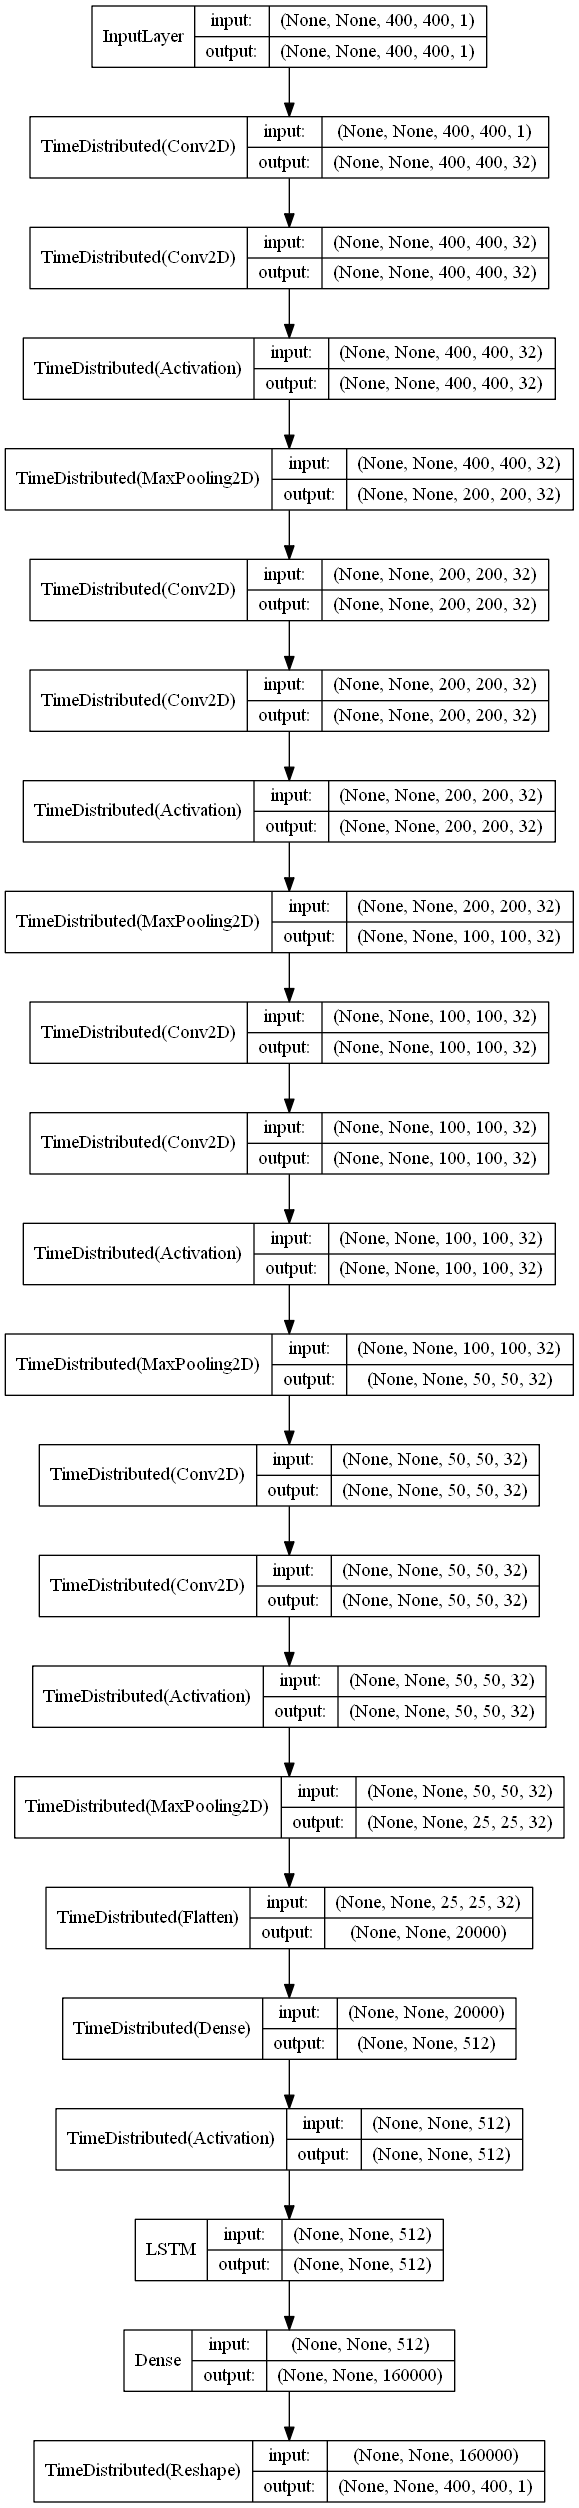

In [3]:
def wiggly_net(Conv2D_N=1,Dense_N=1,LSTM_N=1,LR=1e-4):
    model = keras.models.Sequential()
#Conv2D block############################################################################################
    for _ in range(Conv2D_N):
        model.add(keras.layers.TimeDistributed(keras.layers.Conv2D(32, (2, 2), padding='same'),input_shape=(None, 400, 400, 1)))
        model.add(keras.layers.TimeDistributed(keras.layers.Conv2D(32, (2, 2), padding='same')))
        model.add(keras.layers.TimeDistributed(keras.layers.Activation('relu')))
        model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same')))
########################################################################################################        
    model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
    for _ in range(Dense_N):
        model.add(keras.layers.TimeDistributed(keras.layers.Dense(512)))
        model.add(keras.layers.TimeDistributed((keras.layers.Activation('relu'))))
#LSTM block#############################################################################################
    for _ in range(LSTM_N):
        model.add(keras.layers.LSTM(units=512, activation='tanh', recurrent_activation='sigmoid', unit_forget_bias=True, dropout=0.0, recurrent_dropout=0, return_sequences=True))
########################################################################################################
    model.add(keras.layers.Dense(400*400, activation='linear'))
    model.add(keras.layers.TimeDistributed(keras.layers.Reshape((400,400,1))))
#######################################################################################################
    optimizer = keras.optimizers.Adam(learning_rate=LR)
    model.compile(loss='mae',optimizer=optimizer,metrics=['mse'])
    return model

model=wiggly_net(LR=1e-3,Dense_N=1,Conv2D_N=4)
model.summary()
keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)